# Divisors of a positive integer

## Author: Pedro A. García Sánchez

This notebook interactively plots the set $\mathrm{Divisors}(n)$ under the binary relation $\mid$ (division), with $n$ a positive integer. 

It also has the option to draw the Hasse diagram associated to $(\mathrm{Divisors}(n),\mid)$.


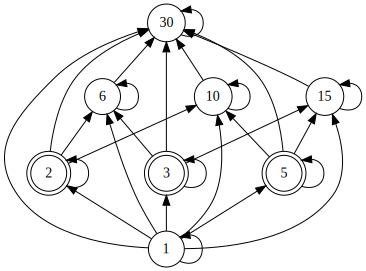

In [1]:
from IPython.display import SVG, display, Image
import graphviz as gv

class relation:
    """
    This is a simplifed version of the "relation" class [see references]
    Attributes:
        l is the set of tuples that defines the binary relation 
        uni is the set where the relation is defined
        zero defined for relations with a minimum
        one defined for relations with a maximum
    """
    def __init__(self, l, uni=set({})):
        """
        Creates a (finie) binary relation from the list of tuples l and an optional universe uni
        If the universe is not specified, then it takse the union of all the tuples in the relation

        Args:
            l a set of pairs (tuples)
            uni (optional) a set where the elements of the tuples are 
        Example:
            >>> r = relation({(1,2),(2,3)}, {1,2,3,4})
            >>> print(r)
            {(1, 2), (2, 3)} on the set {1, 2, 3, 4}
            >>> r
            Binary relation
            >>> r(2,3)
            True
            >>> r(1,3)
            False
        """
        if not(isinstance(l,set)):
            raise TypeError("The argument must be a list of pairs (as lists with two elements)")
        if not(all(isinstance(t,tuple) and len(t)==2 for t in l)):
            raise TypeError("The elements in the list must be lists with two elments (pairs)")
        u = set([])
        for t in l:
            u = u.union(set(t))
        if len(uni)>0:
            if not(u <= uni):
                raise ValueError("There are pairs with elements not in the given universe")
            self.universo = uni
        else:
            self.universo = u
        self.rels = l

    def __repr__(self):
        return "Binary relation"

    def __str__(self):
        return str(self.rels)+" on the set "+str(self.universo)

    def __call__(self, a, b):
        return self.rel(a,b)


    def rel(self,a,b):
        """
        Detects if a and b are related via binary relation
        """
        return (a,b) in self.rels

    def draw(self, l=None):
        """
        Draws the elements in the universe (vertices) and the relations among them (edges)
        If l is given, then displays its elments with a double circle
        """
        g=gv.Digraph(format='svg')
        g.attr('graph', rankdir='BT')
        if l!=None:
            if not(l<=self.universo):
                raise ValueError("The selected nodes are not in the univers")
            g.attr('node', shape='doublecircle')
            for x in l:
                g.node(str(x))
            g.attr('node', shape='circle')
            for x in self.universo.difference(l):
                g.node(str(x))
        else:
            for x in self.universo:
                g.node(str(x))
        for t in self.rels:
            g.edge(str(t[0]),str(t[1]))
        salida= g.render()
        display(SVG(salida))
        return salida

    def hasse(self):
        """
        Draws (and returns) the hasse diagram associated to the relation (removes reflexive and transitive relations)
        """
        rs = set(t for t in self.rels if t[0]!=t[1])
        rsm = set(t for t in self.rels if any(((t[0],x) in rs) and ((x,t[1]) in rs) for x in self.universo))
        g = gv.Graph(format='svg')
        for x in self.universo:
            g.node(str(x))
        for t in rs.difference(rsm):
            g.edge(str(t[1]),str(t[0]))
        salida= g.render()
        display(SVG(salida))
        return relation(rs.difference(rsm))

    def maximals(self, l):
        """
        Computes the maximal elements of l with respect to the relation
        We do now check in this simplified version if the relation is an order relation
        """
        if not(l<=self.universo):
            raise TypeError("The argument must be a subset of the universe")
        return set(a for a in l if set(b for b in l if self.rel(a,b))==set({a}))

    def minimals(self, l):
        """
        Computes the minimal elements of l with respect to the relation
        We do now check in this simplified version if the relation is an order relation
        """
        if not(l<=self.universo):
            raise TypeError("The argument must be a subset of the universe")
        return set(a for a in l if set(b for b in l if self.rel(b,a))==set({a}))

    def maximum(self,l):
        """
        Computes the maximum of l with respect to the relation, if any (otherwise None)
        We do now check in this simplified version if the relation is an order relation
        """
        if not(l<=self.universo):
            raise TypeError("El argumento debe ser un subconjunto del universo de la relación")
        m=self.maximals(l)
        if len(m)!=1:
            return None
        return list(m)[0]

    def minimum(self,l):
        """
        Computes the minimum of l with respect to the relation, if any (otherwise None)
        We do now check in this simplified version if the relation is an order relation
        """
        if not(l<=self.universo):
            raise TypeError("El argumento debe ser un subconjunto del universo de la relación")
        m=self.minimals(l)
        if len(m)!=1:
            return None
        return list(m)[0]

    def infimum(self,l):
        """
        Computes the infimum of l with respect to the relation, if any (otherwise None)
        We do now check in this simplified version if the relation is an order relation
        """
        if not(l<=self.universo):
            raise TypeError("El argumento debe ser un subconjunto del universo de la relación")
        m=self.minorantes(l)
        return self.maximum(m)

    def supremum(self,l):
        """
        Computes the supremum of l with respect to the relation, if any (otherwise None)
        We do now check in this simplified version if the relation is an order relation
        """
        if not(l<=self.universo):
            raise TypeError("El argumento debe ser un subconjunto del universo de la relación")
        m=self.mayorantes(l)
        return self.minimum(m)

    def atomos(self):
        """
        Computes the atoms, though in this simplified version we do not check if the 
        relation is a boolean algebra
        """
        try:
            zero = self.zero
        except AttributeError:
            zero = self.minimum(self.universo)
            if zero==None:
                raise TypeError("The univers does not have a minimum")
            self.zero = zero

        un = self.universo.copy()
        un.remove(zero)
        return self.minimals(un)


def divisores(n):
    """
    Defines the set of divisors of n with divisibility as binary relation, if n is a positive integer
    In the case n is a set of integers, then the universe is this set and the relation is divisibility
    """
    if isinstance(n,int) and n>0:
        u = set(a for a in range(1,n+1) if n%a==0)
        return relation(set((a,b) for a in u for b in u if b%a==0),u)
    if isinstance(n,set) and all(isinstance(x,int) for x in n):
        u = n.copy()
        return relation(set((a,b) for a in u for b in u if b==0 or (a!=0 and b%a==0)))

    raise TypeError("The argument must be either a positive integer or a set of integers")

    
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
  
def plot(d=30, Hasse=True):
    r = divisores(d)
    if Hasse:
        r.hasse()
    else: 
        r.draw(r.atomos())
    
interact(plot,d=IntSlider(min=1,max=100,step=1,value=30),Hasse=False);

### References
* https://github.com/pedritomelenas/LMD/tree/master/relationes%20y%20Algebras%20de%20Boole 

### Keywords

- Graph
- divisors
- Hasse diagram

### Requirements

- graphviz

### License
This notebook is distributed under a [Creative Commons license (CC-BY 4.0)](https://creativecommons.org/licenses/by/4.0/)